# Data-Driven Insights of Airbnb Market in Seattle

In this project, I will be focusing on exploring the key insights of Seattle Airbnb market from the perspectives of interactive data visualization and text mining.

## Business Understanding

The Seattle Airbnb dataset contains files about Airbnb listings in Seattle, calendar availability for each of these listings, user reviews on the listings as well as the geometry information of each neighbourhood. Using this dataset, I attempt to answer the following business questions from three aspects:

* Location impact on Seattle Airbnb market
    - Where are the listings located and what are the average prices of these listings by neighbourhood?

* Advice for tourists 
    - What is the availability of the accommodations and what is the price trend in the near future?

* Insights for hosts
    - What do tourists like about their accommodations and what do they usually complain about if they had a bad experience?

## Data Understanding

In [1]:
import pandas as pd
pd.set_option("max_columns", None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# for interactive maps
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
import branca

# for interactive plotly graphs
import plotly.graph_objs as go

# for sentiment analysis
import re
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from langdetect import detect

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/robustor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The Seattle Airbnb dataset used here is obtained from [insideairbnb.com](http://insideairbnb.com/get-the-data.html) and compiled on October 25, 2020. Let's first get an overview of the dataset.

**LISTINGS data**

In [2]:
# read in the detailed listings data for Seattle
listings_df = pd.read_csv("./listings.csv")
listings_df.head()

id                        listing_url       scrape_id last_scraped  \
0  2318  https://www.airbnb.com/rooms/2318  20201025051148   2020-10-25   
1  9419  https://www.airbnb.com/rooms/9419  20201025051148   2020-10-25   
2  9531  https://www.airbnb.com/rooms/9531  20201025051148   2020-10-25   
3  9534  https://www.airbnb.com/rooms/9534  20201025051148   2020-10-25   
4  9596  https://www.airbnb.com/rooms/9596  20201025051148   2020-10-25   

                                                name  \
0  Casa Madrona - Urban Oasis 1 block from the park!   
1                Glorious sun room w/ memory foambed   
2                The Adorable Sweet Orange Craftsman   
3                   The Coolest Tangerine Dream MIL!   
4         the down home , spacious, central and fab!   

                                         description  \
0  Gorgeous, architect remodeled, Dutch Colonial ...   
1  Keeping you safe is our priority, we are adher...   
2  The Sweet Orange is a delightful and spacious ...   
3  Welcome to my delicious Tangerine Dream!  A co...   
4  We are in a great neighborhood, quiet, full of...   

                               neighborhood_overview  \
0  Madrona is a hidden gem of a neighborhood. It ...   
1  Lots of restaurants (see our guide book) bars,...   
2  The neighborhood is awesome!  Just far enough ...   
3  The neighborhood is the best of two worlds...w...   
4  if you arrive early for check in at 3,  I reco...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/02973ad3-a7a3...     2536   
1  https://a0.muscache.com/pictures/56645186/e5fb...    30559   
2  https://a0.muscache.com/pictures/30470355/052c...    31481   
3  https://a0.muscache.com/pictures/30476721/0751...    31481   
4  https://a0.muscache.com/pictures/665252/102d18...    14942   

                                  host_url  host_name  host_since  \
0   https://www.airbnb.com/users/show/2536      Megan  2008-08-26   
1  https://www.airbnb.com/users/show/30559  Angielena  2009-08-09   
2  https://www.airbnb.com/users/show/31481     Cassie  2009-08-13   
3  https://www.airbnb.com/users/show/31481     Cassie  2009-08-13   
4  https://www.airbnb.com/users/show/14942      Joyce  2009-04-26   

                        host_location  \
0  Seattle, Washington, United States   
1  Seattle, Washington, United States   
2  Seattle, Washington, United States   
3  Seattle, Washington, United States   
4  Seattle, Washington, United States   

                                          host_about  host_response_time  \
0  I welcome guests from all walks of life and ev...        within a day   
1  I am a visual artist who is  the  director of ...  within a few hours   
2  The Sweet Orange reflects my passion and zest ...        within a day   
3  The Sweet Orange reflects my passion and zest ...        within a day   
4  I am a therapist/innkeeper.I know my city well...  within a few hours   

  host_response_rate host_acceptance_rate host_is_superhost  \
0               100%                  78%                 t   
1               100%                  89%                 t   
2               100%                  64%                 t   
3               100%                  64%                 t   
4                90%                  94%                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/user/016a1...   
1  https://a0.muscache.com/im/users/30559/profile...   
2  https://a0.muscache.com/im/users/31481/profile...   
3  https://a0.muscache.com/im/users/31481/profile...   
4  https://a0.muscache.com/im/users/14942/profile...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/016a1...              Minor   
1  https://a0.muscache.com/im/users/30559/profile...         Georgetown   
2  https://a0.muscache.com/im/users/31481/profile...       The Junction   
3  https://a0.mus

In [3]:
listings_df.info(verbose=True,  null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4335 non-null   int64  
 1   listing_url                                   4335 non-null   object 
 2   scrape_id                                     4335 non-null   int64  
 3   last_scraped                                  4335 non-null   object 
 4   name                                          4335 non-null   object 
 5   description                                   4323 non-null   object 
 6   neighborhood_overview                         3045 non-null   object 
 7   picture_url                                   4335 non-null   object 
 8   host_id                                       4335 non-null   int64  
 9   host_url                                      4335 non-null   o

Overall, there are 4335 listings in Seattle on October 25, 2020. The columns I'll be using below include **id**, **neighbourhood_cleansed**, **latitude**, **longitude**, **accommodates** and **price**. We notice that none of the columns has null values.

**CALENDAR data**

In [4]:
# read in the calendar data for Seattle
calendar_df = pd.read_csv("./calendar.csv")
calendar_df.head()

listing_id        date available    price adjusted_price  minimum_nights  \
0    22153582  2020-10-25         t  $144.00        $144.00               3   
1    22153582  2020-10-26         t  $141.00        $141.00               3   
2    22153582  2020-10-27         t  $149.00        $149.00               3   
3    22153582  2020-10-28         t   $96.00         $96.00               3   
4    22153582  2020-10-29         t  $102.00        $102.00               3   

   maximum_nights  
0            1125  
1            1125  
2            1125  
3            1125  
4            1125

In [5]:
calendar_df.info(verbose=True,  null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582275 entries, 0 to 1582274
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   listing_id      1582275 non-null  int64 
 1   date            1582275 non-null  object
 2   available       1582275 non-null  object
 3   price           1582275 non-null  object
 4   adjusted_price  1582275 non-null  object
 5   minimum_nights  1582275 non-null  int64 
 6   maximum_nights  1582275 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 84.5+ MB


The calendar file has 365 records for each listing, i.e., the price and availablity by date for each listing is specified 365 days ahead.

**REVIEWS data**

In [6]:
# read in the detailed reviews data for Seattle
reviews_df = pd.read_csv("./reviews.csv")
reviews_df.head()

listing_id         id        date  reviewer_id reviewer_name  \
0        2318        146  2008-09-15         2451         Kevin   
1        2318  126302712  2017-01-10     12332845       Jessica   
2        2318  140977084  2017-04-01      4789466          Ivan   
3        2318  147262504  2017-04-25     55817131          Mike   
4        2318  161806368  2017-06-18    113604590          Pete   

                                            comments  
0        1000 times better than staying at a hotel.   
1  Our family (two couples, a two year old and an...  
2  Top of the list locations we have stayed at! T...  
3  SUCH an awesome place. Very clean, quiet and s...  
4  We flew quite a distance to be at our only dau...

In [7]:
reviews_df.info(verbose=True,  null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270875 entries, 0 to 270874
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     270875 non-null  int64 
 1   id             270875 non-null  int64 
 2   date           270875 non-null  object
 3   reviewer_id    270875 non-null  int64 
 4   reviewer_name  270875 non-null  object
 5   comments       270752 non-null  object
dtypes: int64(3), object(3)
memory usage: 12.4+ MB


The reviews file holds reviews for each listing. We can see some comments are missing. We will only use comments avalable for the sentiment analysis.

**NEIGHBOURHOODS data**

In [8]:
# load the neighbourhood information
nbh_geo = gpd.read_file('neighbourhoods.geojson', driver='GeoJSON')
nbh_geo.head()

neighbourhood  neighbourhood_group  \
0      Wallingford  Other neighborhoods   
1  West Queen Anne           Queen Anne   
2            Adams              Ballard   
3    West Woodland              Ballard   
4  East Queen Anne           Queen Anne   

                                            geometry  
0  MULTIPOLYGON (((-122.34731 47.66501, -122.3464...  
1  MULTIPOLYGON (((-122.35692 47.63959, -122.3569...  
2  MULTIPOLYGON (((-122.37634 47.67592, -122.3762...  
3  MULTIPOLYGON (((-122.37634 47.67592, -122.3760...  
4  MULTIPOLYGON (((-122.35692 47.63959, -122.3569...

In [9]:
nbh_geo.info(verbose=True,  null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   neighbourhood        91 non-null     object  
 1   neighbourhood_group  91 non-null     object  
 2   geometry             91 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 2.3+ KB


The neighbourhoods file covers the geometry information of 91 neighbourhoods in Seattle. Just as the calendar file, the information present in the neighbourhoods file is also complete.

## Data Preparation and Exploration

Our data preparation step becomes easy since either the information we need is complete or there is no need to impute missing values. The only data wrangling we need to perform is to convert the type of the **price** columns from both the listings and calendar files to the float type.

In [10]:
# add a 'price_clean' column representing converted price values to the listings and calendar data, respectively 
listings_df['price_clean'] = listings_df['price'].str.replace('$','').str.replace(',','').astype(float)
calendar_df['price_clean'] = calendar_df['price'].str.replace('$','').str.replace(',','').astype(float)

Before we move to the step of data modeling, we conduct a brief explorary data analysis to gain a sense of the primary locations, room types and accommodation of the listings.

#### Locations on the map

In [11]:
# show the locations of listings in an interactive map
lats = listings_df['latitude'].tolist()
lons = listings_df['longitude'].tolist()
locations = list(zip(lats, lons))

seattle_coordinates = [47.6097, -122.3331]
loc_map = folium.Map(location=seattle_coordinates, zoom_start=11)
FastMarkerCluster(data=locations).add_to(loc_map)
loc_map.save('listing_locations.html')
loc_map

As expected, most listings are located in the center area of the city. This map is interactive, and we can zoom-in on the clusters to eventually find the individual locations of the listings. 

#### Room types

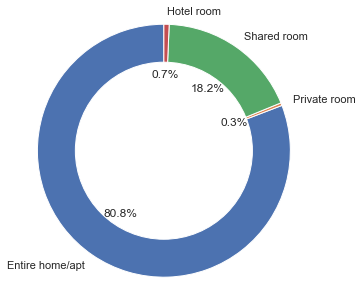

In [12]:
# plot the distribution of room type in a pie chart
plt.figure(figsize=(5, 5))
my_circle = plt.Circle((0, 0), 0.7, color='white')

d = plt.pie(listings_df.groupby(['room_type'])['id'].nunique().reset_index().id,
            labels=listings_df['room_type'].unique(),
            autopct='%1.1f%%',
            startangle=90,
            labeldistance=1.1)
plt.axis('equal')
plt.gca().add_artist(my_circle)
plt.savefig('room_type_dist.png', bbox_inches='tight', dpi=150)

In Seattle, a majority of Airbnb listings is entire home/apartment. The listings for private room and hotel room are very rare.

#### Accommodates

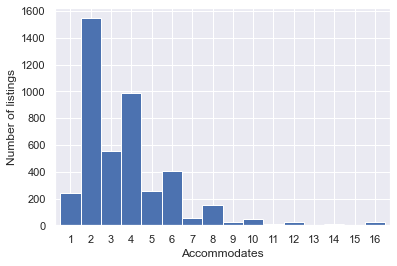

In [13]:
# plot the distribution of the apartment size based on the number of people that can be accommodated
feq = listings_df['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(6, 4), width=1, rot=0)
plt.ylabel('Number of listings')
plt.xlabel('Accommodates')
plt.savefig('accommodate_dist.png', bbox_inches='tight', dpi=150)

It can be seen that most listings are for 2 people.

## Data Modeling and Results

#### Q1: Where are the listings located and what are the average prices of these listings by neighbourhood?

**Number of listings by neighbourhood**

In [14]:
# calculate the number of listings by neighbourhood
nbh_count = listings_df.groupby('neighbourhood_cleansed')['id'].nunique().reset_index()
nbh_count.rename(columns={'neighbourhood_cleansed':'neighbourhood'}, inplace=True)
nbh_geo_count = pd.merge(nbh_geo, nbh_count, on='neighbourhood', how='left')
nbh_geo_count['id'] = nbh_geo_count['id'].fillna(0).astype(int)

# calculate the percentage of listings by neighbourhood
nbh_geo_count['pct'] = nbh_geo_count['id'] / nbh_geo_count['id'].sum()
nbh_geo_count['pct_str'] = nbh_geo_count['pct'].apply(lambda x : str(round(x*100, 1)) + '%')

# create a colorbar
nbh_count_colormap = branca.colormap.linear.YlGnBu_09.scale(min(nbh_geo_count['id']), max(nbh_geo_count['id']))

In [15]:
# plot the number of listings by neighbourhood on an interactive folium map
nbh_locs_map = folium.Map(location=seattle_coordinates, zoom_start=11, tiles='cartodbpositron')

style_function = lambda x: {
    'fillColor': nbh_count_colormap(x['properties']['id']),
    'color': 'white',
    'weight': 1,
    'fillOpacity': 0.7
}

folium.GeoJson(
    nbh_geo_count,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['neighbourhood', 'id', 'pct_str'],
        aliases=['Neighbourhood', 'Listings', 'Percentage'],
        localize=True
    )
).add_to(nbh_locs_map)

# add the colorbar to the map
nbh_count_colormap.add_to(nbh_locs_map)
nbh_count_colormap.caption = 'Number of listings by neighbourhood'

nbh_locs_map.save('neighbourhood_listings.html')
nbh_locs_map

The spatial distribution of listings shows listings are concentrated in two areas. One is Belltown-Center Business District-Broadway neighbourhoods, which represents the downtown area. The other one is the Wallingford-University District area, which includes the campus of University of Washington (UW). Both downtown area and UW campus are attractive choices for tourists to visit.

**Average daily price by neighbourhood**

To compare average daily price by neighbourhood, we only select the neighbourhoods including at least 5 listings with the most common type of accommodation, which is accommodation for 2 people.

In [16]:
# calculate the average daily price by neighbourhood
nbh_price = listings_df[listings_df['accommodates']==2].groupby('neighbourhood_cleansed') \
            .filter(lambda x: len(x) >= 5).groupby('neighbourhood_cleansed')['price_clean'].mean().reset_index()
nbh_price.rename(columns={'neighbourhood_cleansed':'neighbourhood'}, inplace=True)
nbh_geo_price = pd.merge(nbh_geo, nbh_price, on='neighbourhood')

# create a colorbar
nbh_price_colormap = branca.colormap.linear.YlOrRd_09.scale(min(nbh_price['price_clean']), max(nbh_price['price_clean']))

In [17]:
# plot the average daily price by neighbourhood on an interactive folium map
nbh_locs_price_map = folium.Map(location=seattle_coordinates, zoom_start=11, tiles='cartodbpositron')

style_function = lambda x: {
    'fillColor': nbh_price_colormap(x['properties']['price_clean']),
    'color': 'white',
    'weight': 1,
    'fillOpacity': 0.7
}


folium.GeoJson(
    nbh_geo_price,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['neighbourhood', 'price_clean'],
        aliases=['Neighbourhood', 'Average price'],
        localize=True
    )
).add_to(nbh_locs_price_map)

# add the colorbar to the map
nbh_price_colormap.add_to(nbh_locs_price_map)
nbh_price_colormap.caption = 'Average daily price by neighbourhood'

nbh_locs_price_map.save('neighbourhood_prices.html')
nbh_locs_price_map

It can be seen that the costliest neighbourhoods are also in the downtown area due to high demand, while the average rental prices of UW campus area are far cheaper. Other relatively expensive places, such as West Woodland and North Beach/Blue Ridge are waterfront neighbourhoods. 

#### Q2: What is the availability of the accommodations and what is the price trend in the near future?

**Availability over time**

In [18]:
# calculate the sum of available listings by date
sum_available = calendar_df[calendar_df['available'] == 't'] \
                .groupby(['date']).size().to_frame(name='available').reset_index()
# convert 'date' to 'weekday'
sum_available['date'] = pd.to_datetime(sum_available['date'])
sum_available['weekday'] = sum_available['date'].dt.day_name()

# plot the sum of available listings by date
fig = go.Figure(data=go.Scatter(x=sum_available['date'],
                                y=sum_available['available'],
                                text=sum_available['weekday']))

# set the layout
fig.update_layout(
    autosize=False,
    width=480,
    height=360,
    margin=dict(l=0, r=0, t=30, b=0),
    xaxis_title = 'Date',
    yaxis_title = 'Number of listings available'
)

fig.write_html('availability_over_time.html')
fig.show()

It shows that there are generally more accomodations available up to three months ahead than further into next year. Part of the reason might be that hosts are more actively updating their calendars in this timeframe. Besides, due to Seattle's rainy winter, most of people prefer to visit Seattle in summer or autumn instead. 

**Average price by date**

In [19]:
listings_df.rename(columns={'id':'listing_id'}, inplace=True)
calendar_df = pd.merge(calendar_df, listings_df[['listing_id','accommodates']], on='listing_id', how='left')

average_price = calendar_df[(calendar_df['available'] == 't') & (calendar_df['accommodates'] == 2)] \
                .groupby(['date'])['price_clean'].mean().reset_index()
average_price['date'] = pd.to_datetime(average_price['date'])
average_price['weekday'] = average_price['date'].dt.day_name()

fig = go.Figure(data=go.Scatter(x=average_price['date'],
                                y=average_price['price_clean'],
                                text=average_price['weekday']))
fig.update_layout(
    autosize=False,
    width=480,
    height=360,
    margin=dict(l=0, r=0, t=30, b=0),
    xaxis_title = 'Date',
    yaxis_title = 'Average price of 2p accommodation'
)

fig.write_html('average_2p_price_over_time.html')
fig.show()

We find that the peak of average daily price for a 2-person place occurs on September 4 next year at about $132, and the cyclical pattern is due to higher prices in weekends.

#### Q3: What do tourists like about their accommodations and what do they usually complain about if they had a bad experience?

Last, we want to find out which housing properties (e.g., proximity of restaurants, shops, hygiene, safety, etc.) lead to a good rental experience, and explore some of the worst reviews. Here, we adopt a python package **VADER** which is a lexicon and rule-based sentiment analysis tool, the compute the polarity score of the comments. 

The advantages of VADER over traditional methods of sentiment analysis include:

* It works exceedingly well on social media type text, since it is specifically attuned to sentiments expressed in social media
* It doesn’t require any training data 
* It is fast enought to deal with large-scale datasets

Reference: https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

In [20]:
def get_sentiment(text):
    '''Get the compound polarity score of a text 
    
    Args:
    text: (str) the text of a comment
    
    Returns:
    polarity_score: (float) the compound polarity score of the text
    '''
    polarity_score = SentimentIntensityAnalyzer().polarity_scores(str(text))['compound']
    
    return polarity_score

reviews_df['polarity_score'] = reviews_df['comments'].apply(get_sentiment)
reviews_df[['comments', 'polarity_score']].head()

comments  polarity_score
0        1000 times better than staying at a hotel.           0.4404
1  Our family (two couples, a two year old and an...          0.9976
2  Top of the list locations we have stayed at! T...          0.9796
3  SUCH an awesome place. Very clean, quiet and s...          0.9059
4  We flew quite a distance to be at our only dau...          0.9184

In [21]:
# print number of positive, negative and neutral compound polarity scores
print('Positive compound scores: {}'.format(reviews_df[reviews_df['polarity_score'] > 0]['polarity_score'].count()))
print('Negative compound scores: {}'.format(reviews_df[reviews_df['polarity_score'] < 0]['polarity_score'].count()))
print('Neutral compound scores: {}'.format(reviews_df[reviews_df['polarity_score'] == 0]['polarity_score'].count()))

Positive compound scores: 261464
Negative compound scores: 3013
Neutral compound scores: 6398


We can see that an overwhelming proportion of reviews are positive. Now let's take a closer look at a few examples of the best and worst reviews.

In [22]:
# explore the best reviews
best_comments = reviews_df[['comments', 'polarity_score']].sort_values(by='polarity_score').tail(5)
for index, row in best_comments.iterrows():
    print("Review (score: {}): {} \n".format(row['polarity_score'], row['comments']))

Review (score: 0.9995): This was our third trip to Seattle to visit our son and our first experience with Airbnb. We definitely hit the jackpot with finding Carter’s house. It is beautiful, comfortable, wonderfully decorated, private, and has a “million dollar view.” The view looks like a painting from every angle. The ferry moving silently in and out of the dock confirms that it’s not a painting but real…even well into the night when you watch the lights of the ferries criss-cross across the Sound in silence. We were lucky to have nice weather for our six days and enjoyed seeing the sunset every evening. It was uncharacteristically warm for Seattle and Carter’s house is one of the few that has air-conditioning. The house has everything you could want or need. The well-equipped kitchen is a delight to prepare meals in. The master bedroom and bathroom are exquisite. The rain shower is every bit as wonderful as is described. The two sitting rooms are gorgeous and a pleasure to relax in. 

In [23]:
# explore the worst reviews
worst_comments = reviews_df[['comments', 'polarity_score']].sort_values(by='polarity_score').head(5)
for index, row in worst_comments.iterrows():
    print("Review (score: {}): {} \n".format(row['polarity_score'], row['comments']))

Review (score: -0.996): Renting an AirBnB was supposed to be both cheaper and more comfortable than checking into a hotel. It was neither.
After spending a little over $3,000 on checking in, and registering my pets as guests as well, I was asked for another $750 as a pet deposit. This made sense, since I would expect the need for a deep cleaning. 
The woman who met us at the condo was very nice, though I suppose we should have asked her to take pictures of all of the problems we found on check in so we could clearly show it was not our doing, but we did not expect to be charged any more. 
The area itself is very nice, though the fact that there was a pool and gym did not mean anything to us since we stayed during the COVID-19 lockdown. 
The bed is not comfortable, nor are the pillows. The bed is thin and has no box spring, meaning you can feel the slats underneath it. It was terrible to sleep on. So terrible that we purchased inflatable mattresses a week into our stay to avoid sleeping

We find:

* Polarity scores are correlated with the length of reviews. The more efforts one spends in writing a review, the more polarized score the review gets.
* Reviews with words in capital letters and exclamation signs are often rated more polarized.
* Reviews written in non-English seem to be rated badly on the polarity score. It may be a limitation of VADER.

In [24]:
def tokenize(text):
    '''Transform raw text data to a bag of words
    
    Args:
    text: (str) raw text data
        
    Returns:
    tokens: (list) a list of strings after tokenization
    '''
    # remove any hyperlinks 
    text = re.sub("((\S+)?(http(s)?)(\S+))|((\S+)?(www)(\S+))", " ", text)
    
    # normalize case and remove punctuation
    text = re.sub("[^a-zA-Z]", " ", text.lower())

    # tokenize text
    tokens = word_tokenize(text)
    
    # lemmatize and remove stop words
    tokens = [WordNetLemmatizer().lemmatize(word)
              for word in tokens if word not in stopwords.words("english")] 
    
    # remove all words with one or two letters since those do not bring useful information
    tokens = [word for word in tokens if len(word) > 2] 
    
    return tokens

Here, instead of counting the frequency of words in the corpus, we use the term frequency-inverse document frequency (TF-IDF) to rank words. TF-IDF penalizes overused terms, which helps reduce non-informative words.

In [25]:
tfidf = TfidfVectorizer(sublinear_tf=True, 
                        min_df=5, 
                        norm='l2', 
                        encoding='latin-1', 
                        ngram_range=(1, 2), 
                        stop_words='english', 
                        tokenizer=tokenize)

Note that we pass some additional parameters to the TF-IDF class: 
* Set **sublinear_tf** to True as we will use the log of the frequency, since word frequencies follow an exponential distribution (see Zipf's law) 
* Normalize our vectors to **l2 norm** so that the length of a document does not bias its representation
* Take **bigrams** (pairs of words) into account as they might carry a different meaning than each of their components separately 

Reference: https://cloud.google.com/blog/products/gcp/problem-solving-with-ml-automatic-document-classification

Next, let’s compare the features of accommodations that received positive vs. negative reviews via word clouds.

In [26]:
def plot_wordcloud(comments, output_filename, background_color='white', max_words=100):
    """Generate a word cloud image given a corpus of comments
    
    Args:
    comments: (iterable) a corpus of comments
    output_filename: (str) the output file name
    background_color: (str) background color for the word cloud image
    max_words: (int) the maximum number of words.
    
    Returns:
    None
    """
    features = tfidf.fit_transform(comments).toarray()
    df = pd.DataFrame(features.tolist(), columns=tfidf.get_feature_names())
    
    # generate word cloud
    wordcloud = WordCloud(background_color=background_color, max_words=max_words, width=1600, height=800) \
                .generate_from_frequencies(df.T.sum(axis=1))
    
    # display the generated image
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(output_filename + '.png', bbox_inches='tight', dpi=150)

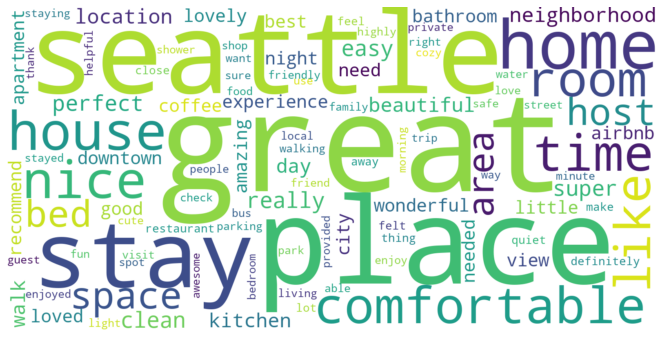

In [27]:
# generate a word cloud for the positive comments
pos_comments = reviews_df[['comments','polarity_score']].sort_values(by='polarity_score')['comments'].tail(500)
plot_wordcloud(pos_comments, 'pos_wordcloud')

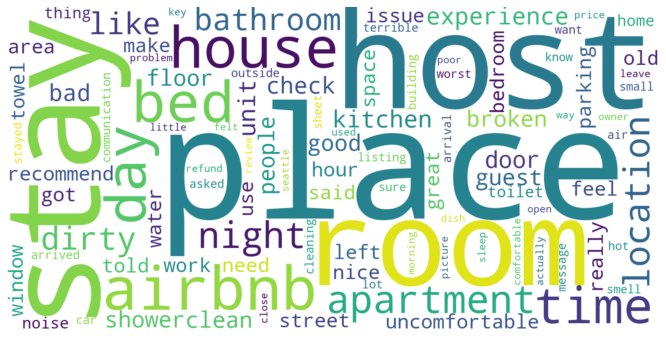

In [28]:
# generate a word cloud for the negative comments
neg_comments = reviews_df[['comments','polarity_score']].sort_values(by='polarity_score')['comments'].head(500)

# remove non-English comments
neg_comments_en = neg_comments[neg_comments.apply(detect) == 'en']
plot_wordcloud(neg_comments_en, 'neg_wordcloud')

It’s not surprising the top positive terms include:
**walk**, **restaurants**, **food**, **shop**, **bus**, **park**, **view**, **safe** and **quiet**.

In contrast, the top negative terms include: **dirty**, **broken**, **noise**, **smell**, **old** and **small**. Besides, it seems the guests often have issues with amenities, such as **shower**, **door**, **towel**, **window**, **toilet** and **sheet**.